# Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [7]:
X_train[0].shape

(28, 28)

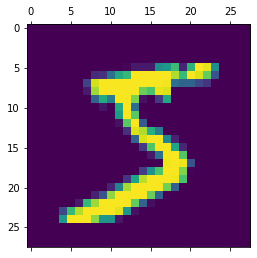

In [8]:
plt.matshow(X_train[0])

In [12]:
y_train[0]

5

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 3ms/step - loss: 0.7099 - accuracy: 0.8190
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.9125
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2880 - accuracy: 0.9197
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2661 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2608 - accuracy: 0.9270


In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.9257


[0.2674848735332489, 0.9257000088691711]

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.9690692e-02, 4.0206265e-07, 8.7127745e-02, 9.5964944e-01,
       2.8955042e-03, 1.4637971e-01, 2.6122964e-06, 9.9985111e-01,
       1.4062014e-01, 7.3389596e-01], dtype=float32)

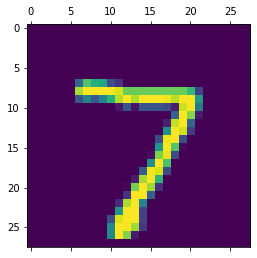

In [21]:
plt.matshow(X_test[0])

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    1,    5,    9,    3,    3,    1],
       [   0, 1112,    4,    1,    0,    1,    4,    2,   11,    0],
       [   3,    9,  930,   11,    9,    3,   12,    9,   43,    3],
       [   2,    0,   22,  910,    1,   25,    2,   11,   29,    8],
       [   1,    2,    3,    1,  922,    0,   12,    4,    9,   28],
       [   7,    3,    6,   31,   12,  764,   13,    7,   44,    5],
       [   7,    3,    7,    1,    7,   11,  916,    2,    4,    0],
       [   1,    5,   24,    5,    9,    0,    0,  948,    6,   30],
       [   3,    7,    6,   16,    9,   21,    8,   10,  890,    4],
       [   8,    7,    2,    9,   33,    6,    0,   21,   12,  911]])>

Text(69.0, 0.5, 'Truth')

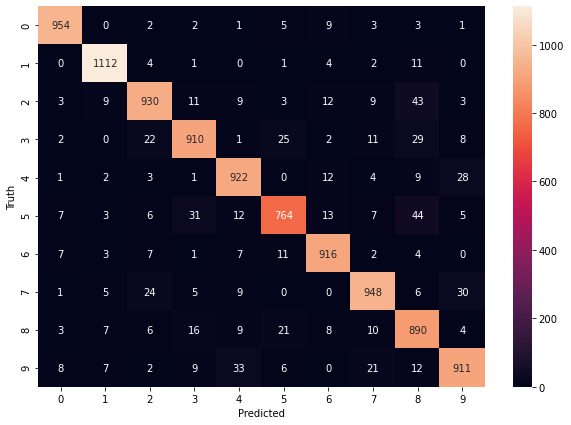

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 5ms/step - loss: 0.4409 - accuracy: 0.8782 0s - loss: 0.4
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1301 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0851 - accuracy: 0.9744 0s - loss: 0.0851 - accura
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0650 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0508 - accuracy: 0.9844


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 3s 4ms/step - loss: 0.0761 - accuracy: 0.9771: 0s - loss: 0.1034 -  - ETA: 0s - loss: 0.0805 - accura


[0.07614194601774216, 0.9771000146865845]

Text(69.0, 0.5, 'Truth')

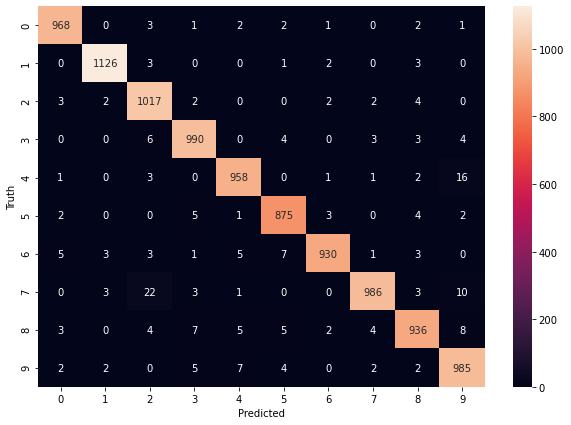

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4505 - accuracy: 0.8753
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1307 - accuracy: 0.9618
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0906 - accuracy: 0.9735 1s - loss: 0.0909 - accuracy: 0.97 - ETA: 0s - loss: 0.0907 - 
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0666 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0512 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0409 - accuracy: 0.9875 0s - loss: 0.040
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0325 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0266 - accuracy: 0.9916: 1s - loss: 0.026 - ETA: 0s
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - l

In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0784 - accuracy: 0.9782


[0.07843104004859924, 0.9782000184059143]